# Notebook for testing R package 'convex'

This notebook is an illustration of using Jarvis March function for finding convex hull of a set of points in a plane. The 'jarvis_march' function is contained in the R package made from C++ scripts, within the 'convex' package, there are also other functions to better understand and visialize the convex hull within the package.

## Part A
Using the package 'devtools' to download the R package 'convex' from my personal github account (username: VicYue)

In [1]:
install.packages('devtools')

Installing package into ‘/home/yuew1/STOR-601-env/R-packages’
(as ‘lib’ is unspecified)



In [2]:
library('devtools')

Loading required package: usethis



In [3]:
install_github("VicYue/convex")

Skipping install of 'convex' from a github remote, the SHA1 (e04d480a) has not changed since last install.
  Use `force = TRUE` to force installation



In [4]:
library(convex)

## Part B
Testing Jarvis March function using jarvis_march() in the 'convex' package, the input is a list of points in a plane and the output is a list of line segments connecting the convex hull with each element $(x_{i},y_{i},x_{i+1},y_{i+1})$ representing a line from point $(x_{i},y_{i})$ to point $(x_{i+1},y_{i+1})$.

In [5]:
dataline <- read.csv("line.csv",header=FALSE)
data_line <- list()
for (i in 1:nrow(dataline)){
    data_line[[i]]<- c(dataline[i,1],dataline[i,2])
}

In [6]:
jarvis_march(data_line)

[[1]]
[1] 1 1 3 3

[[2]]
[1] 3 3 1 1

In [7]:
datapgram <- read.csv("pgram.csv",header=FALSE)
data_pgram <- list()
for (i in 1:nrow(datapgram)){
    data_pgram[[i]]<- c(datapgram[i,1],datapgram[i,2])
}

In [8]:
jarvis_march(data_pgram)

[[1]]
[1] 1 1 2 1

[[2]]
[1] 2 1 3 2

[[3]]
[1] 3.0 2.0 2.5 2.5

[[4]]
[1] 2.5 2.5 1.0 1.0

In [9]:
datarandom <- read.csv("random.csv",header=FALSE)
data_random <- list()
for (i in 1:nrow(datarandom)){
    data_random[[i]]<- c(datarandom[i,1],datarandom[i,2])
}

In [10]:
jarvis_march(data_random)

[[1]]
[1] -0.7165739  1.2021970 -0.6052002  0.9571341

[[2]]
[1] -0.6052002  0.9571341 -0.4322490  0.6001854

[[3]]
[1] -0.4322490  0.6001854  0.1561969  0.5371963

[[4]]
[1] 0.1561969 0.5371963 0.3539223 0.6549453

[[5]]
[1] 0.3539223 0.6549453 0.5058236 1.1200131

[[6]]
[1] 0.5058236 1.1200131 0.3589844 1.5667731

[[7]]
[1]  0.3589844  1.5667731 -0.3809517  1.4531055

[[8]]
[1] -0.3809517  1.4531055 -0.5452923  1.4050365

[[9]]
[1] -0.5452923  1.4050365 -0.7165739  1.2021970

In [11]:
datasquare <- read.csv("square.csv",header=FALSE)
data_square <- list()
for (i in 1:nrow(datasquare)){
    data_square[[i]]<- c(datasquare[i,1],datasquare[i,2])
}

In [12]:
jarvis_march(data_square)

[[1]]
[1] 1 2 1 1

[[2]]
[1] 1 1 2 1

[[3]]
[1] 2 1 2 2

[[4]]
[1] 2.0 2.0 1.5 2.5

[[5]]
[1] 1.5 2.5 1.0 2.0

## Part C
The 'plotconvex' function in the R package takes the same input as 'jarvis_march' (a list of points in a plane), and output a plot that illustrate both the input points and highlighted (red) convex hull points with red line segments connecting the convex hull.

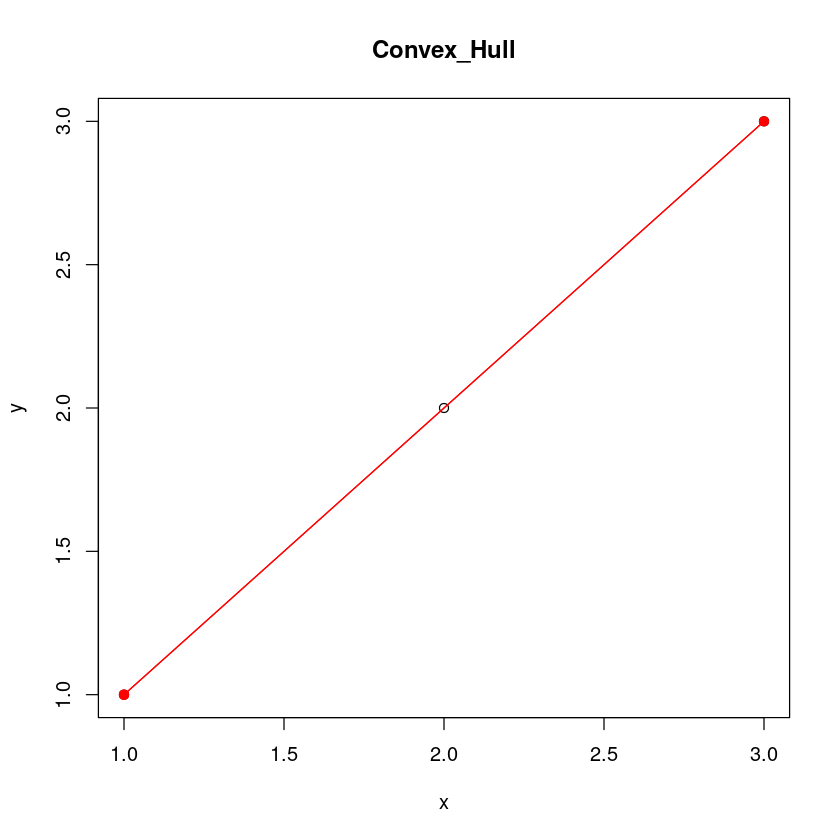

In [13]:
plotconvex(data_line)

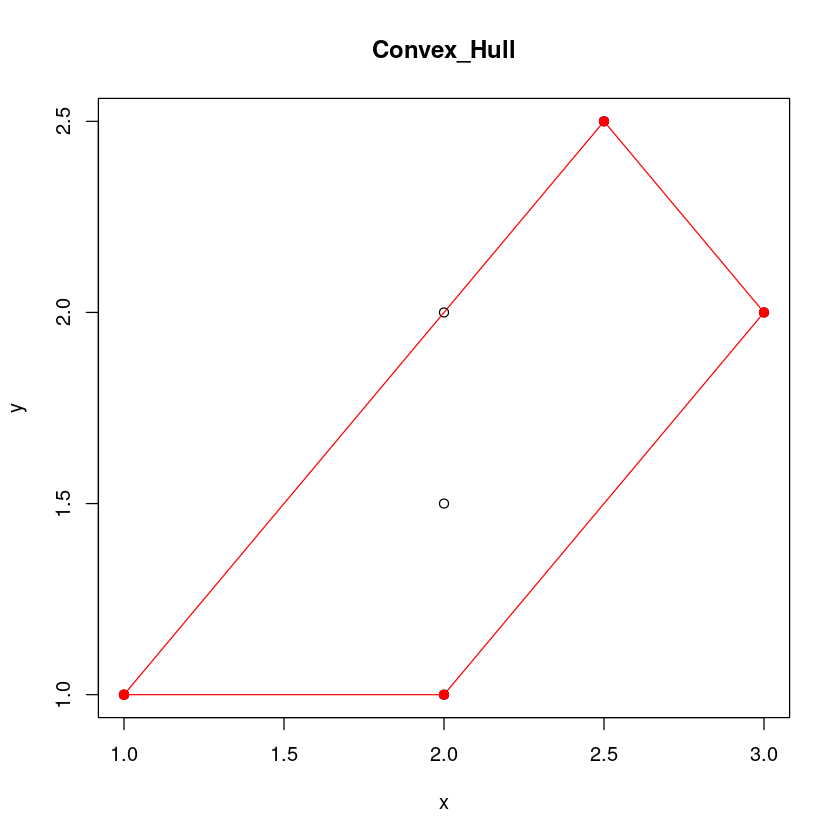

In [14]:
plotconvex(data_pgram)

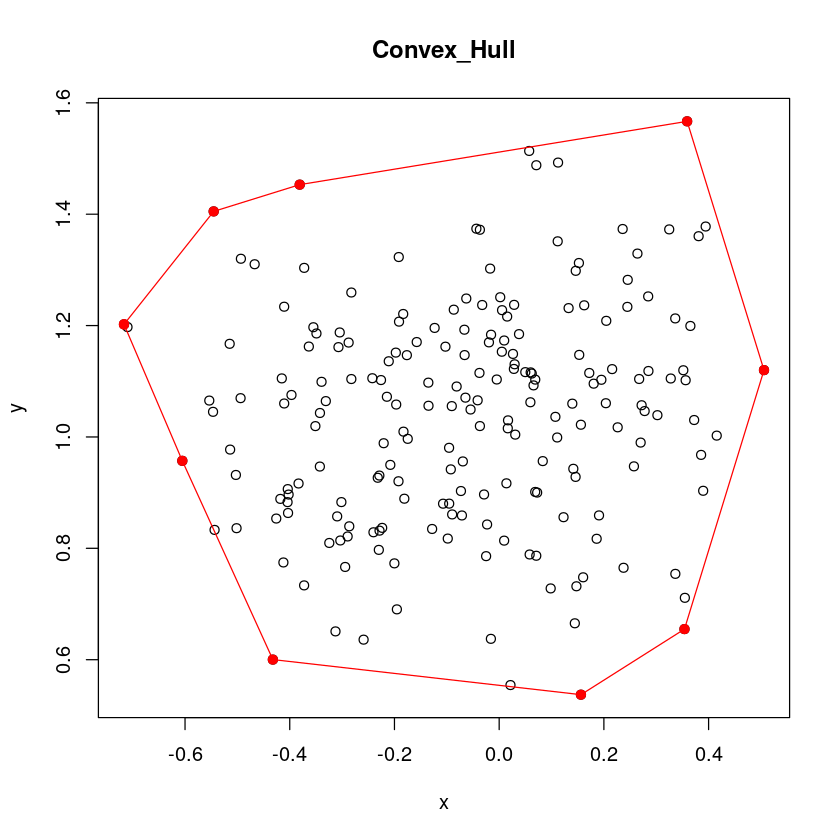

In [15]:
plotconvex(data_random)

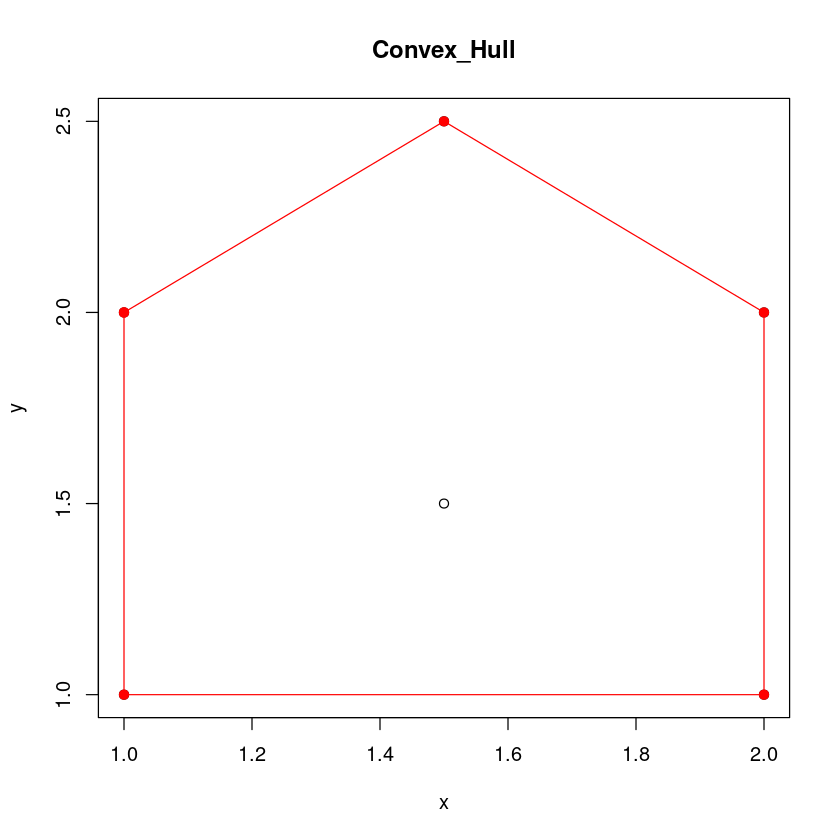

In [16]:
plotconvex(data_square)

## Part D
We might also be interested in checking if a certain point (or points) is (are) in the convex hull. What we mean by 'in the convex hull' is whether the point is an element from the output of jarvis march function. Taking the square dataset for example, we know from the previous result that the convex hull are {$(1,1), (2,1), (2,2), (1.5,2.5), (1,2)$}. All the possible output of the function are illustrated in the following tests. 

#### Test 1: When all the points we want to test are elements from the convex hull

In [17]:
inhull(data_square,list(c(1,1)))

[1] "All the points are in the Convex Hull"


In [18]:
inhull(data_square,list(c(1,1),c(2,1),c(1.5,2.5)))

[1] "All the points are in the Convex Hull"


#### Test 2: When SOME of the points we want to test are elements from the convex hull, but SOME of them aren't

In [19]:
inhull(data_square,list(c(1,1),c(2,1),c(1.5,1.5)))

[1] "Some of the points are in the Convex Hull"


#### Test 3: When NONE of the points we want to test are elements from the convex hull

In [20]:
inhull(data_square,list(c(1.5,1.5)))

[1] "None of the points are in the Convex Hull"


In [21]:
inhull(data_square,list(c(1.5,1.5),c(1.2,1.2)))

[1] "None of the points are in the Convex Hull"


## Part E
The jarvis_march function could also take different types of input data structure. We will be illustrating all the possible data structure it could take in the following several test cases.      

#### Test 1: List

In [22]:
dt1<- list(c(1,1),c(2,2),c(3,3))
jarvis_march(dt1)

[[1]]
[1] 1 1 3 3

[[2]]
[1] 3 3 1 1

#### Test 2: Dataframe

In [23]:
dt2<- data.frame(x=c(1,2,3),y=c(1,2,3))
jarvis_march(dt2)

[[1]]
[1] 1 1 3 3

[[2]]
[1] 3 3 1 1

#### Test 3: Matrix

In [24]:
dt3<- matrix(c(1,1,2,2,3,3),nrow=3,ncol=2, byrow=TRUE)
jarvis_march(dt3)

Warning message in if (class(input) == "data.frame") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(input) != "data.frame") {:
“the condition has length > 1 and only the first element will be used”


[[1]]
[1] 1 1 3 3

[[2]]
[1] 3 3 1 1

## Part F
Error checking in the jarvis_march function. There are some scenarios where the input we give to the jarvis march function that might break the function. The following are two examples of such scenarios. By adjusting the function, we should get corresponding error message as a warning on what's wrong with the input.

#### Test 1: When the input data structure is not acceptable for the algorithm

In [25]:
er1<- c(1,1,2,2,3,3)
jarvis_march(er1)

ERROR: Error in jarvis_march(er1): This function only accepts input class being a list, a matrix or a dataframe


#### Test 2: When the input data set has less than 3 points 

In [26]:
er2<- list(c(1,1))
jarvis_march(er2)

ERROR: Error in jarvis_march(er2): The length of input points should be larger than 2!
